In [ ]:
print("\n" + "="*50 + "\n")
import pandas as pd

## Handling Outliers

In [ ]:

import pandas as pd
df = pd.read_csv("home_price.csv") 
df.describe()


,Net_Metrekare,Brüt_Metrekare,Oda_Sayısı,Fiyat,Binanın_Kat_Sayısı,Banyo_Sayısı
count,20326.000000,2.032600e+04,20066.00000,2.032600e+04,20326.000000,20280.000000
mean,151.964528,1.437683e+09,3.68940,4.649510e+06,5.185969,1.492751
std,1137.304466,2.049686e+11,1.11206,7.136120e+07,3.051288,0.795747
min,0.000000,2.000000e+00,1.00000,2.000000e+04,1.000000,0.000000
25%,90.000000,1.000000e+02,3.00000,1.640000e+06,3.000000,1.000000
50%,120.000000,1.350000e+02,4.00000,2.300000e+06,4.000000,1.000000
75%,150.000000,1.700000e+02,4.00000,3.300000e+06,6.000000,2.000000
max,110000.000000,2.922222e+13,12.00000,7.500000e+09,15.000000,6.000000


In [ ]:
# Checking for outliers in numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = num_cols[(num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))]

print(outliers.dropna(how="all"))

       Net_Metrekare  Brüt_Metrekare  Oda_Sayısı      Fiyat  \
2                NaN             NaN         NaN        NaN   
3                NaN             NaN         NaN        NaN   
5                NaN             NaN         NaN        NaN   
6                NaN             NaN         NaN        NaN   
7                NaN           750.0         NaN        NaN   
...              ...             ...         ...        ...   
20269          256.0             NaN         NaN        NaN   
20287          674.0           675.0         NaN        NaN   
20291            NaN           378.0         NaN        NaN   
20302            NaN             NaN         NaN  6850000.0   
20311          463.0           464.0         NaN  7850000.0   

       Binanın_Kat_Sayısı  Banyo_Sayısı  
2                    14.0           NaN  
3                    14.0           NaN  
5                    13.0           NaN  
6                    14.0           NaN  
7                     NaN        

In [ ]:
print("### Outlier Cleaning (Capping) on Numerical Columns ###")

def clip_outliers(df, columns):
    for col in columns:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df

df = clip_outliers(df, ['Fiyat', 'Net_Metrekare', 'Brüt_Metrekare'])
df.describe()

### Outlier Cleaning (Capping) on Numerical Columns ###


,Net_Metrekare,Brüt_Metrekare,Oda_Sayısı,Fiyat,Binanın_Kat_Sayısı,Banyo_Sayısı
count,20326.000000,20326.000000,20066.00000,2.032600e+04,20326.000000,20280.000000
mean,128.636721,154.662600,3.68940,3.128497e+06,5.185969,1.492751
std,69.270094,108.833169,1.11206,2.988716e+06,3.051288,0.795747
min,40.000000,47.000000,1.00000,6.112500e+05,1.000000,0.000000
25%,90.000000,100.000000,3.00000,1.640000e+06,3.000000,1.000000
50%,120.000000,135.000000,4.00000,2.300000e+06,4.000000,1.000000
75%,150.000000,170.000000,4.00000,3.300000e+06,6.000000,2.000000
max,500.000000,833.000000,12.00000,1.983750e+07,15.000000,6.000000


In [ ]:
# End of outlier handling

In [ ]:
df.head(20)

,Net_Metrekare,Brüt_Metrekare,Oda_Sayısı,Bulunduğu_Kat,Eşya_Durumu,Binanın_Yaşı,Isıtma_Tipi,Fiyat,Şehir,Binanın_Kat_Sayısı,Kullanım_Durumu,Yatırıma_Uygunluk,Takas,Tapu_Durumu,Banyo_Sayısı
0,120,150.0,4.0,4.Kat,Eşyalı,21 Ve Üzeri,Kombi Doğalgaz,950000.0,adana,6,Boş,NaN,Var,Kat Mülkiyeti,1.0
1,100,125.0,4.0,3.Kat,Boş,4,Kombi Doğalgaz,1250000.0,adana,10,Boş,NaN,Var,NaN,1.0
2,89,95.0,3.0,4.Kat,Boş,0 (Yeni),Kombi Doğalgaz,1750000.0,adana,14,Boş,Uygun,Var,NaN,1.0
3,40,55.0,2.0,6.Kat,Boş,0 (Yeni),Kombi Doğalgaz,1300000.0,adana,14,Boş,Uygun,Yok,NaN,1.0
4,140,150.0,4.0,Düz Giriş (Zemin),Boş,5-10,Klimalı,1700000.0,adana,4,Boş,Uygun,Yok,Kat Mülkiyeti,1.0
5,40,55.0,2.0,12.Kat,Boş,5-10,Klimalı,765000.0,adana,13,Kiracı Oturuyor,NaN,NaN,Kat Mülkiyeti,1.0
6,90,110.0,3.0,2.Kat,NaN,0 (Yeni),Kombi Doğalgaz,1700000.0,adana,14,Boş,Uygun,NaN,NaN,1.0
7,180,750.0,5.0,NaN,Boş,16-20,Klimalı,3950000.0,adana,2,Mülk Sahibi Oturuyor,Uygun,NaN,NaN,1.0
8,105,145.0,4.0,8.Kat,NaN,4,Kombi Doğalgaz,1995000.0,adana,11,Boş,Uygun,NaN,Kat Mülkiyeti,1.0
9,110,130.0,4.0,4.Kat,NaN,5-10,Kombi Doğalgaz,2550000.0,adana,11,Boş,Uygun,Yok,Kat İrtifakı,1.0


# EDA

## Bivariate analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Correlation Analysis (Heatmap)

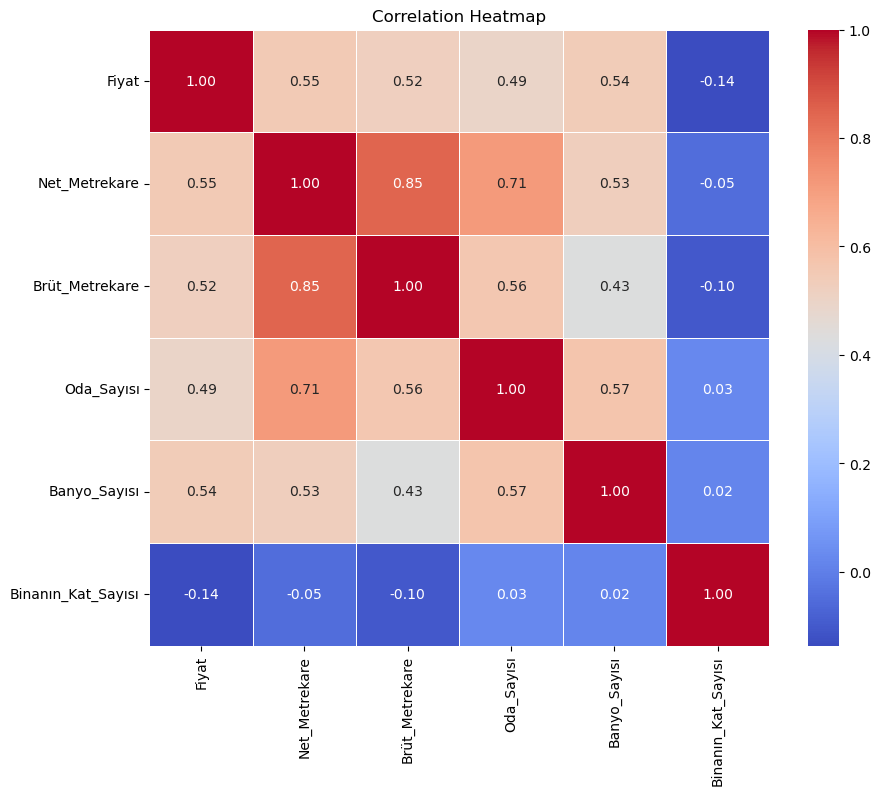

In [ ]:
numeric_cols = ['Fiyat', 'Net_Metrekare', 'Brüt_Metrekare', 'Oda_Sayısı', 'Banyo_Sayısı', 'Binanın_Kat_Sayısı']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Inferences
Looking at the data, there isn't really a strong connection between the variables. The size of the house and the number of bathrooms are the best indicators we have. As you’d expect, bigger homes naturally come with more rooms, but interestingly, the height of the building—how many floors it has—is basically irrelevant and doesn't really impact the price tag at all.

### Scatter Plots

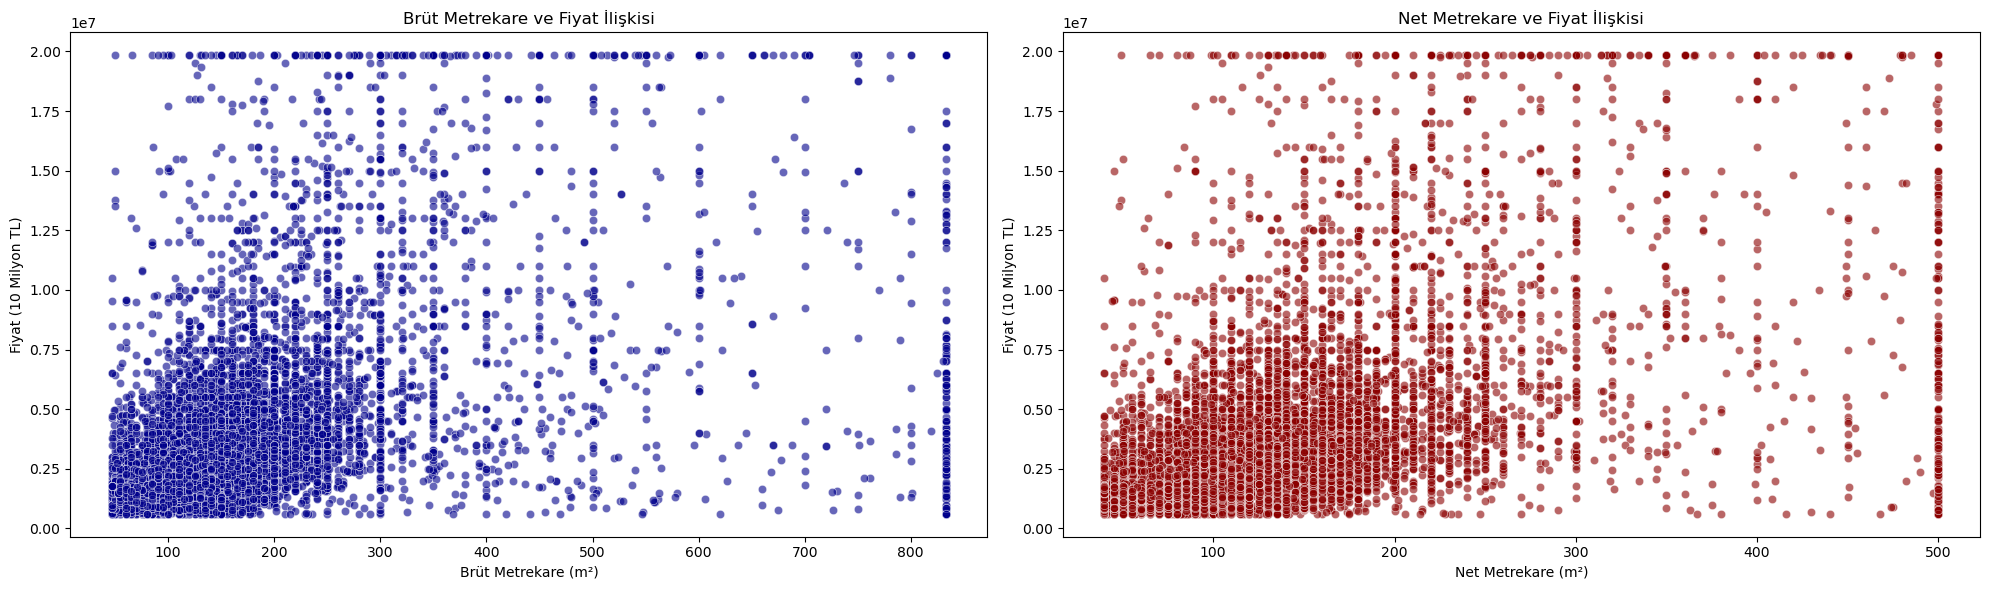

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- 1. Brüt Metrekare ve Fiyat İlişkisi ---
sns.scatterplot(data=df, x='Brüt_Metrekare', y='Fiyat', alpha=0.6, color='darkblue', ax=axes[0])
axes[0].set_title('Brüt Metrekare ve Fiyat İlişkisi')
axes[0].set_xlabel('Brüt Metrekare (m²)')
axes[0].set_ylabel('Fiyat (10 Milyon TL)')

# --- 2. Net Metrekare ve Fiyat İlişkisi ---
sns.scatterplot(data=df, x='Net_Metrekare', y='Fiyat', alpha=0.6, color='darkred', ax=axes[1]) # Rengi ayırt edilsin diye darkred yaptım
axes[1].set_title('Net Metrekare ve Fiyat İlişkisi')
axes[1].set_xlabel('Net Metrekare (m²)')
axes[1].set_ylabel('Fiyat (10 Milyon TL)')
plt.tight_layout()

### Inferences
 At first, it looks like price and size go hand in hand. But as the properties get bigger, that connection starts to fall apart. For large houses, prices are all over the place, which shows that size isn't the only thing driving the cost anymore. It gets totally unpredictable, and you can't really rely on square footage alone.

## Box Plot

C:\Users\hamza\AppData\Local\Temp\ipykernel_18300\2650882590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Oda_Sayısı', y='Fiyat', palette='viridis')


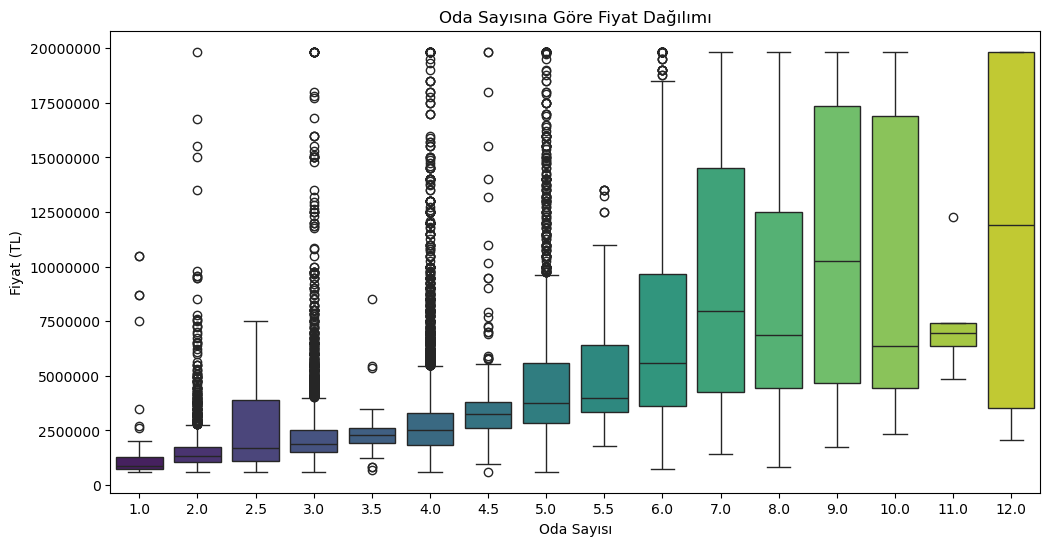

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Oda_Sayısı', y='Fiyat', palette='viridis')
plt.title('Oda Sayısına Göre Fiyat Dağılımı')
plt.xlabel('Oda Sayısı')
plt.ylabel('Fiyat (TL)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Inferences
The chart shows that while having more rooms generally raises the price, it’s not a strict rule. Standard homes with 2 to 5 rooms see huge price differences, proving that factors like luxury or location can make a small apartment cost as much as a mansion. Also, for very large properties, the prices are all over the place, making it clear that you can't predict a home's value just by counting its rooms.

C:\Users\hamza\AppData\Local\Temp\ipykernel_18300\4271868596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Şehir'].isin(top_cities)], x='Şehir', y='Fiyat', palette='Set2', ax=axes[0])
C:\Users\hamza\AppData\Local\Temp\ipykernel_18300\4271868596.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Şehir'] == 'istanbul'], x='Şehir', y='Fiyat', palette='Set2', ax=axes[1], width=0.5)


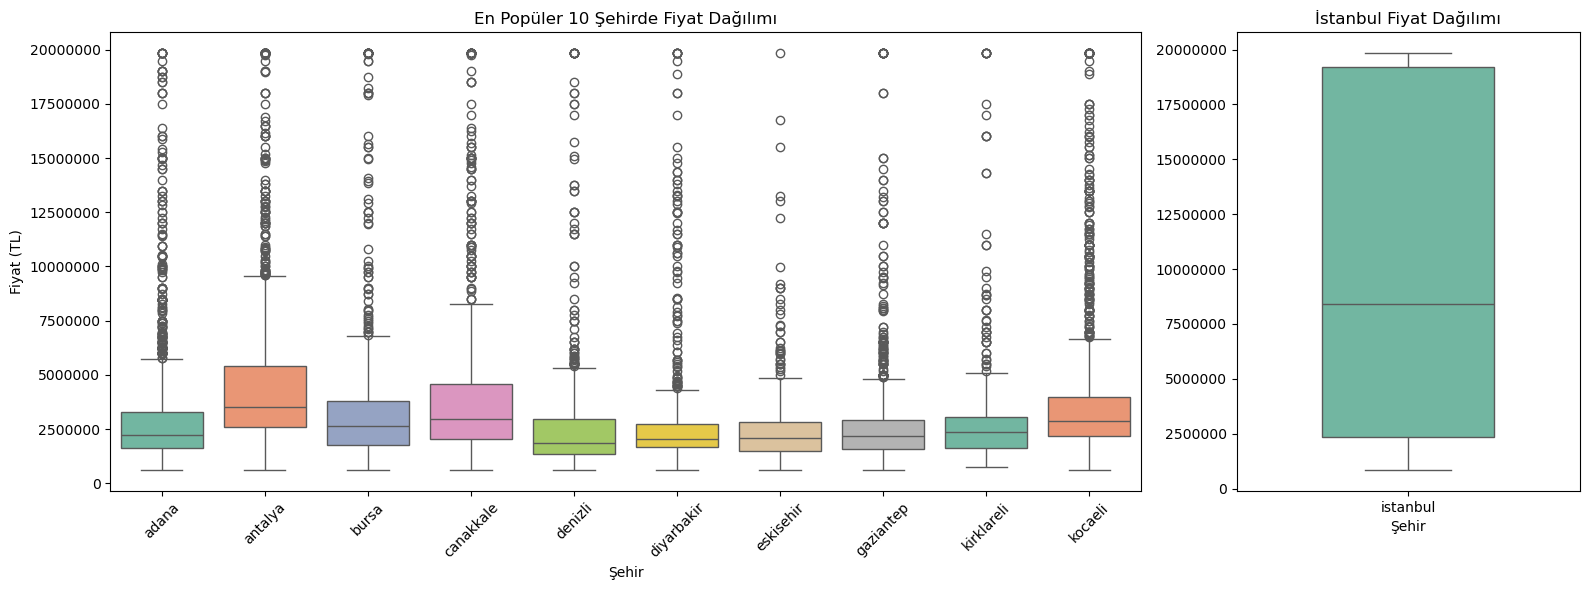

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# --- 1. Top 10 Şehir ---
top_cities = df['Şehir'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Şehir'].isin(top_cities)], x='Şehir', y='Fiyat', palette='Set2', ax=axes[0])

axes[0].set_title('En Popüler 10 Şehirde Fiyat Dağılımı')
axes[0].set_ylabel('Fiyat (TL)')
axes[0].tick_params(axis='x', rotation=45) 
axes[0].ticklabel_format(style='plain', axis='y')

# --- 2.  İstanbul ---
sns.boxplot(data=df[df['Şehir'] == 'istanbul'], x='Şehir', y='Fiyat', palette='Set2', ax=axes[1], width=0.5)

axes[1].set_title('İstanbul Fiyat Dağılımı')
axes[1].set_ylabel('') 
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


### Inferences
Istanbul stands out with prices that are far higher and much more varied than anywhere else. Cities like Antalya lead the rest of the pack due to tourism, while inland areas remain significantly cheaper and more predictable. However, it’s interesting to see that regardless of the average cost, every single city still features a few ultra-luxury outliers that hit the price ceiling, proving that expensive real estate exists everywhere.